# Import : by GitHub

You can try this code in Colab by this method.  

In [ ]:
!git clone https://github.com/KanghwaSisters/24_2_mainSession.git

Cloning into '24_2_mainSession'...
remote: Enumerating objects: 162, done.
remote: Counting objects: 100% (162/162), done.
remote: Compressing objects: 100% (122/122), done.
remote: Total 162 (delta 68), reused 93 (delta 25), pack-reused 0 (from 0)
Receiving objects: 100% (162/162), 993.62 KiB | 6.25 MiB/s, done.
Resolving deltas: 100% (68/68), done.


In [ ]:
import os
os.chdir('/content/24_2_mainSession/4주차/env')

In [ ]:
! python GridWorldEnvironment.py

In [ ]:
from GridWorldEnvironment import GridWorldEnvironment

In [ ]:
env = GridWorldEnvironment(start_point=(0,0),
                           end_point=(4,4),
                           gridworld_size=(5,5))

# SARSA Class

In [ ]:
import numpy as np
import random
from collections import defaultdict

In [ ]:
class SARSA:
    def __init__(self, actions):
        # 행동
        self.action_spaces = env.action_space
        self.num_actions = len(self.action_spaces)
        # 상태(교재와 동일)
        self.step_size = 0.01
        self.discount_factor = 0.9
        self.epsilon = 0.1
        # 0을 초깃값으로 가지는 큐함수 테이블 생성
        self.q_table = defaultdict(lambda: np.zeros(self.num_actions))

    # <s, a, r, s', a'>의 샘플로부터 큐함수를 업데이트
    def learn(self, state, action_idx, reward, next_state, next_action_idx):

        '''
        state를 string으로 변환하는 이유??
        q_table을 defaultdict로 했기 때문에
        dictionary의 키 값으로 (n,n)형태의 state를 string의 형태로 넣기 위해서
        '''

        # SARSA 식
        state, next_state = str(state), str(next_state)
        current_q = self.q_table[state][action_idx]
        next_state_q = self.q_table[next_state][next_action_idx]
        td = reward + self.discount_factor * next_state_q - current_q
        new_q = current_q + self.step_size * td
        self.q_table[state][action_idx] = new_q

    # 입실론 탐욕 정책에 따라서 행동을 선택
    def get_action(self, state):
        if np.random.rand() < self.epsilon:
            # 무작위 행동 반환
            action_idx = np.random.choice(range(self.num_actions))
        else:
            # 큐함수에 따른 행동 반환
            state = str(state)
            q_list = self.q_table[state]
            action_idx = self.argmax(q_list)

        return action_idx

    # 큐함수 값에 따라 최적의 행동을 반환
    # np.argmax 안 쓰고 만드는 이유??
    # argmax 오류/flatten 문제
    def argmax(self, q_list):
        # q_list에서 최댓값을 반환
        max_value = np.amax(q_list)
        # np.where의 반환값은 튜플형식이고 1차원 인덱스 배열만 필요
        max_idx_list = np.where(max_value == q_list)[0]
        # 최댓값을 가진 여러 인덱스가 있을 때, 그 중 하나를 무작위로 선택
        return np.random.choice(max_idx_list)

# Main

- **SARSA**를 이용해 그리드 월드 학습시키기  
- 학습 지표 시각화

In [ ]:
env = GridWorldEnvironment(start_point=(0,0),
                           end_point=(4,4),
                           gridworld_size=(5,5))
agent = SARSA(env.action_space)
EPISODES = 1000
# 속도를 최적화하기 위해 rendering 비활성화
RENDER_PROCESS = False # 학습 중 실시간 rendering
RENDER_END = False # 에피소드 종료 후 상태 rendering
total = []

In [ ]:
for episode in range(EPISODES):
    # 게임 환경과 상태를 초기화
    state = env.reset()
    # 현재 상태에 대한 행동을 선택
    action_idx = agent.get_action(state)
    num = 0

    done = False
    while not done:
        # 결과가 너무 길게 나와서
        if RENDER_PROCESS:
            env.render()

        # 행동을 취한 후 다음 상태 보상 에피소드의 종료 여부를 받아옴
        next_state, reward, done = env.step(action_idx)
        # 다음 상태에서의 다음 행동을 선택
        next_action_idx = agent.get_action(next_state)
        # <<s, a, r, s', a'>>로 큐함수를 업데이트
        agent.learn(state, action_idx, reward, next_state, next_action_idx)

        state = next_state
        action_idx = next_action_idx
        num += 1

    total.append(num)
    if (episode+1) % 100 == 0:
        print(f"[Episode]: {episode+1}/{EPISODES} __ [mean]:{np.mean(total[episode-99:]):.1f} __ [Epsilon]: {agent.epsilon:.3f}")

    if RENDER_END:
        env.render()

[Episode]: 100/1000 __ [mean]:12.4 __ [Epsilon]: 0.100
[Episode]: 200/1000 __ [mean]:8.9 __ [Epsilon]: 0.100
[Episode]: 300/1000 __ [mean]:8.9 __ [Epsilon]: 0.100
[Episode]: 400/1000 __ [mean]:8.8 __ [Epsilon]: 0.100
[Episode]: 500/1000 __ [mean]:8.9 __ [Epsilon]: 0.100
[Episode]: 600/1000 __ [mean]:8.9 __ [Epsilon]: 0.100
[Episode]: 700/1000 __ [mean]:8.9 __ [Epsilon]: 0.100
[Episode]: 800/1000 __ [mean]:9.0 __ [Epsilon]: 0.100
[Episode]: 900/1000 __ [mean]:8.9 __ [Epsilon]: 0.100
[Episode]: 1000/1000 __ [mean]:9.0 __ [Epsilon]: 0.100


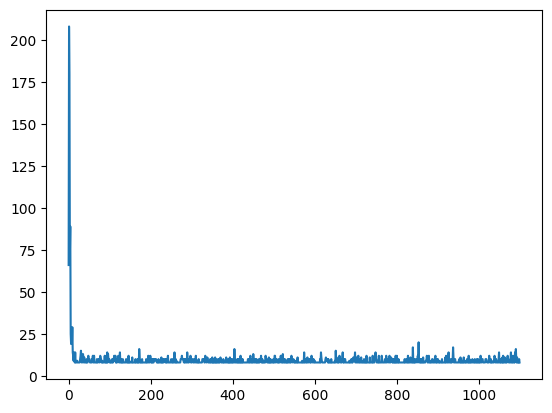

In [ ]:
# 에이전트의 이동횟수 시각화
import matplotlib.pyplot as plt
plt.plot(total)

In [ ]:
# 결과 확인
env.render()

S . . . . 
X . . . . 
X X X X . 
. . . X . 
. . . X A 

